## Titanic dataset
### Test out modelling approaches

In [3]:
import pandas as pd
import numpy as np


In [4]:
train_data = pd.read_csv("train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# random submission

submission = test_data.copy(deep=True)
submission['Survived'] = np.random.choice([0,1], len(submission))
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_random.csv', index=False)


In [14]:
# gender-only tree

submission = test_data.copy(deep=True)
submission['Survived'] = np.where(submission.Sex=='female',1,0)
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_gender.csv', index=False)
# score 0.76

In [16]:
t = train_data.copy(deep=True)
t['Pred'] = np.where(t.Sex=='female',1,0)
t['Score'] = np.where(t.Pred==t.Survived,1,0)
t.Score.sum()/t.Score.count()


0.7867564534231201

In [71]:
# set up data

y = train_data['Survived']
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_data[features])

features_list = X.columns
X.head()


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


In [55]:
# random forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1, max_depth=5, random_state=1)
# note - single tree
model_rf.fit(X, y)



RandomForestClassifier(max_depth=5, n_estimators=1, random_state=1)

In [60]:
# performance on train data

t = train_data.copy(deep=True)
t['pred'] = model_rf.predict(X)
np.sum(t.pred==t.Survived)/len(t)

0.8035914702581369

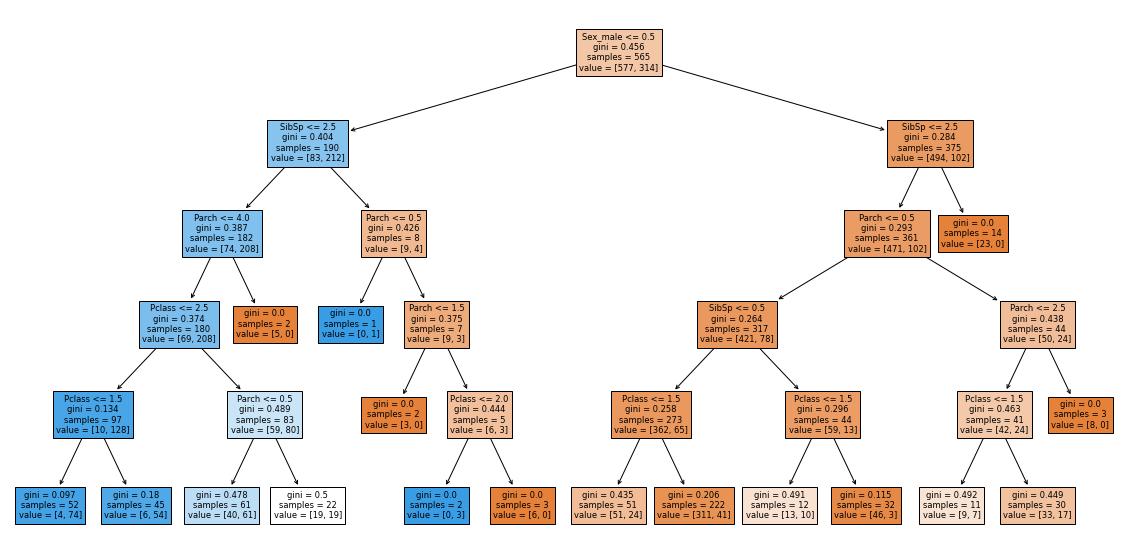

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20,10))
plot_tree(model_rf.estimators_[0], filled=True, feature_names=features_list)
plt.show()

In [62]:
X_test = pd.get_dummies(test_data[features])
submission = test_data.copy(deep=True)
submission['Survived'] = model_rf.predict(X_test)
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_rf.csv', index=False)
# score 0.77

In [13]:
# gradientboostingclassifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier


In [66]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(X, y)

GradientBoostingClassifier()

In [67]:
t = train_data.copy(deep=True)
t['pred'] = model_gbc.predict(X)
np.sum(t.pred==t.Survived)/len(t)

0.8159371492704826

In [68]:
X_test = pd.get_dummies(test_data[features])
submission = test_data.copy(deep=True)
submission['Survived'] = model_gbc.predict(X_test)
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_gbc.csv', index=False)
# score 0.77

In [69]:
# xgboost

In [86]:
from xgboost import XGBClassifier

In [87]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X, y)

[15:10:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
t = train_data.copy(deep=True)
t['pred'] = model_xgb.predict(X)
np.sum(t.pred==t.Survived)/len(t)

0.8159371492704826

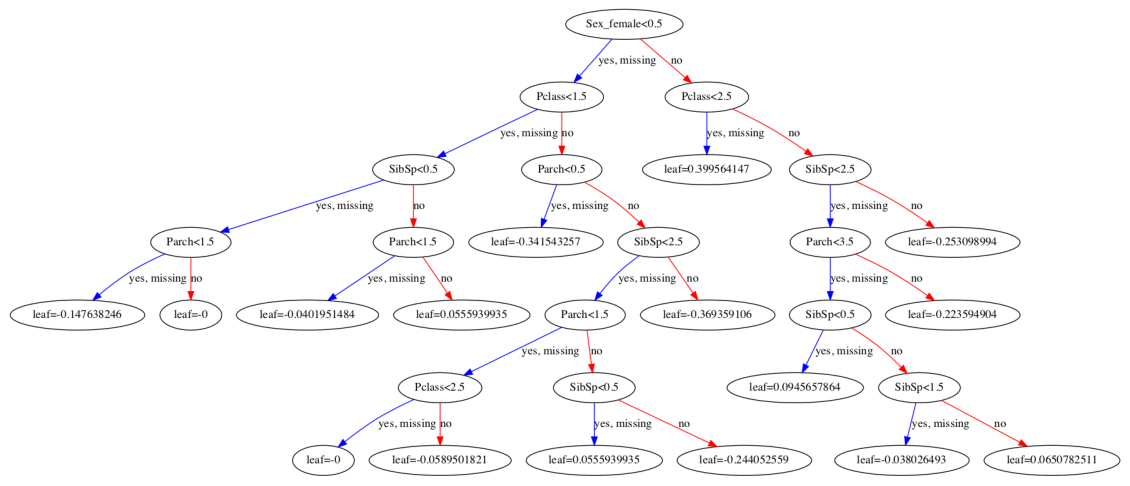

In [114]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,20))
xgb.plot_tree(model_xgb,num_trees=1,ax=ax)
plt.show()

In [115]:
X_test = pd.get_dummies(test_data[features])
submission = test_data.copy(deep=True)
submission['Survived'] = model_xgb.predict(X_test)
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_xgb.csv', index=False)
# score 0.77

In [116]:
# neural network


In [118]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [191]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [248]:
# 1-hot encoded dataset
#['Pclass', 'Sex', 'SibSp', 'Parch']

data = train_data.copy(deep=True)
data['male'] = np.where(data.Sex=='male',1,0)
data['female'] = np.where(data.Sex=='female',1,0)
data['pclass1'] = np.where(data.Pclass==1,1,0)
data['pclass2'] = np.where(data.Pclass==2,1,0)
data['pclass3'] = np.where(data.Pclass==3,1,0)
data['sibsp0'] = np.where(data.SibSp==0,1,0)
data['sibsp1'] = np.where(data.SibSp==1,1,0)
data['sibsp2'] = np.where(data.SibSp>=2,1,0)
data['parch0'] = np.where(data.Parch==0,1,0)
data['parch1'] = np.where(data.Parch==1,1,0)
data['parch2'] = np.where(data.Parch>=2,1,0)

features = ['male','female','pclass1','pclass2','pclass3','sibsp0','sibsp1','sibsp2','parch0','parch1','parch2']
n_features = len(features)

x_data = data[features]
y_data = data.Survived

len(x_data),len(y_data)

(891, 891)

In [249]:
import torch
from torch import nn


In [251]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(n_features,50),
            nn.Linear(50,50),
            nn.Linear(50,50),            
            nn.Linear(50,1),
        )
        
    def forward(self, x):
        output = self.net(x)
        return output


In [252]:
model = NeuralNetwork()
model

NeuralNetwork(
  (net): Sequential(
    (0): Linear(in_features=11, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [253]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [254]:
for i in range(100):
    
    for j in range(len(x_data)):
        
        X = torch.tensor(x_data.iloc[j], dtype=torch.float)
        y = torch.tensor(y_data.iloc[j], dtype=torch.float)

        pred = model(X)
        loss = loss_fn(pred,y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if i%10==0:
        print(f'loss: {loss.item()}')
        


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: 0.04865381866693497
loss: 0.005326193757355213
loss: 0.0056988936848938465
loss: 0.005842987913638353
loss: 0.005952589679509401
loss: 0.00605267146602273
loss: 0.006146485451608896
loss: 0.006234797183424234
loss: 0.006317921914160252
loss: 0.006396277341991663


In [255]:
X = torch.tensor(x_data.iloc[20], dtype=torch.float)
y = torch.tensor(y_data.iloc[20], dtype=torch.float)

with torch.no_grad():
    pred = 0 if model(X)<0.5 else 1
    print(pred,y)

0 tensor(0.)


In [256]:
t = data.copy(deep=True)
cols = features+['PassengerId','Survived']
t=t[cols]

x = torch.tensor(x_data.values, dtype=torch.float)
with torch.no_grad():
    pred_model = model(x).numpy()
t['pred_model'] = pred_model

t['pred'] = np.where(t['pred_model']>0.5,1,0)
np.sum(t.pred==t.Survived)/len(t)


0.7957351290684624

In [257]:
t


,male,female,pclass1,pclass2,pclass3,sibsp0,sibsp1,sibsp2,parch0,parch1,parch2,PassengerId,Survived,pred_model,pred
0,1,0,0,0,1,0,1,0,1,0,0,1,0,0.096245,0
1,0,1,1,0,0,0,1,0,1,0,0,2,1,0.910524,1
2,0,1,0,0,1,1,0,0,1,0,0,3,1,0.586191,1
3,0,1,1,0,0,0,1,0,1,0,0,4,1,0.910524,1
4,1,0,0,0,1,1,0,0,1,0,0,5,0,0.079428,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,1,0,0,1,0,0,887,0,0.235299,0
887,0,1,1,0,0,1,0,0,1,0,0,888,1,0.893707,1
888,0,1,0,0,1,0,1,0,0,0,1,889,0,0.595000,1
889,1,0,1,0,0,1,0,0,1,0,0,890,1,0.386944,0


In [260]:
data = test_data.copy(deep=True)
data['male'] = np.where(data.Sex=='male',1,0)
data['female'] = np.where(data.Sex=='female',1,0)
data['pclass1'] = np.where(data.Pclass==1,1,0)
data['pclass2'] = np.where(data.Pclass==2,1,0)
data['pclass3'] = np.where(data.Pclass==3,1,0)
data['sibsp0'] = np.where(data.SibSp==0,1,0)
data['sibsp1'] = np.where(data.SibSp==1,1,0)
data['sibsp2'] = np.where(data.SibSp>=2,1,0)
data['parch0'] = np.where(data.Parch==0,1,0)
data['parch1'] = np.where(data.Parch==1,1,0)
data['parch2'] = np.where(data.Parch>=2,1,0)

features = ['male','female','pclass1','pclass2','pclass3','sibsp0','sibsp1','sibsp2','parch0','parch1','parch2']
n_features = len(features)

x_data = data[features]

x = torch.tensor(x_data.values, dtype=torch.float)
with torch.no_grad():
    pred_model = model(x).numpy()
data['pred_model'] = pred_model

data['pred'] = np.where(data['pred_model']>0.5,1,0)

submission = data.copy(deep=True)
submission['Survived'] = submission.pred
submission = submission[['PassengerId','Survived']]
submission.to_csv('submission_nn.csv', index=False)

# score 0.77
